In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas_datareader

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
tickerSymbol="AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-5-13')
tickerDf=tickerDf.reset_index()
#print(tickerDf)
tickerDf=tickerDf.drop(['Date'],axis=1)
#tickerDf=tickerDf.drop(['Close'],axis=1)
print(tickerDf.head())

       Open      High       Low     Close     Volume  Dividends  Stock Splits
0  6.469952  6.502388  6.438123  6.487535  493729600        0.0           0.0
1  6.505419  6.535430  6.464495  6.498750  601904800        0.0           0.0
2  6.498750  6.524518  6.388710  6.395379  552160000        0.0           0.0
3  6.419023  6.426602  6.337175  6.383555  477131200        0.0           0.0
4  6.375068  6.426603  6.337479  6.425996  447610800        0.0           0.0


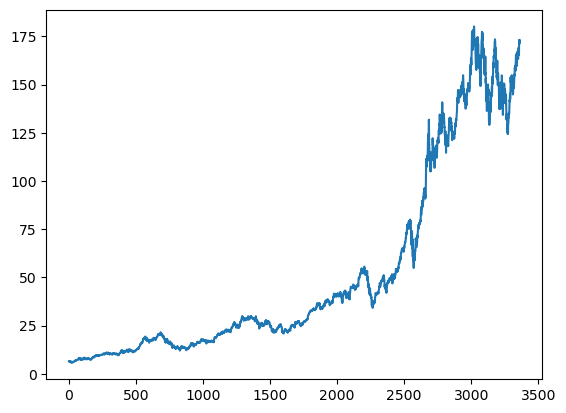

In [8]:
plt.plot(tickerDf.Close)

In [9]:
mavg100=tickerDf.Close.rolling(100).mean()

In [10]:
mavg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3358    149.925712
3359    150.190206
3360    150.495055
3361    150.868615
3362    151.252602
Name: Close, Length: 3363, dtype: float64

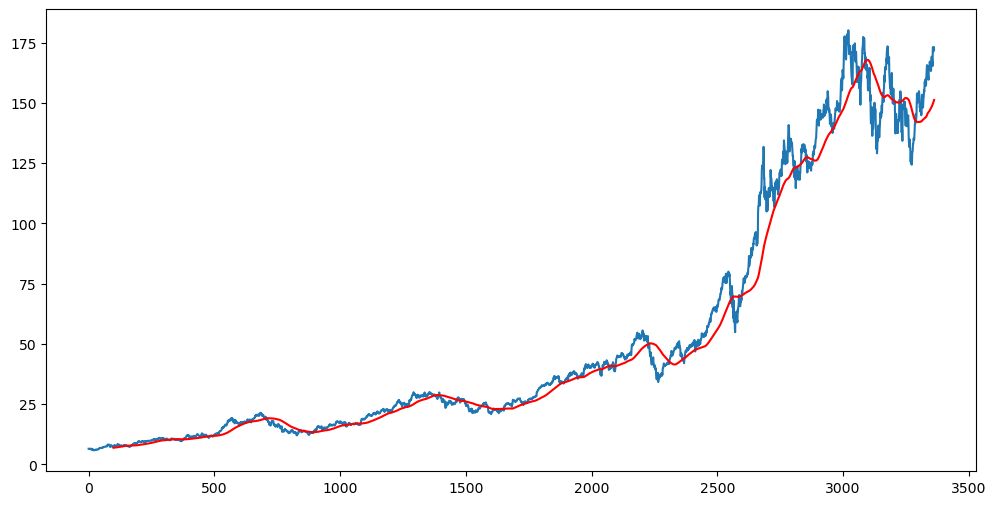

In [11]:
plt.figure(figsize=(12,6))
plt.plot(tickerDf.Close)
plt.plot(mavg100,'r')

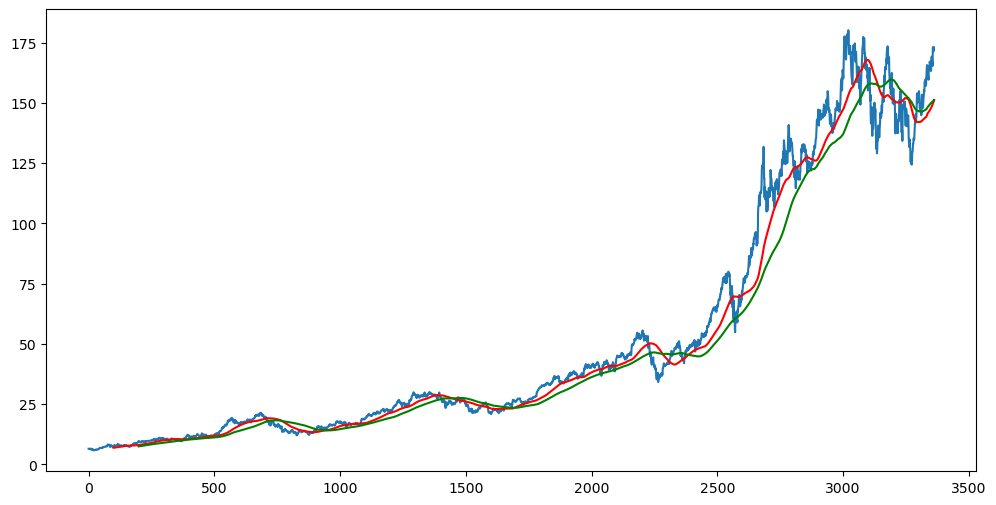

In [12]:
mavg200=tickerDf.Close.rolling(200).mean()
mavg200
plt.figure(figsize=(12,6))
plt.plot(tickerDf.Close)
plt.plot(mavg100,'r')
plt.plot(mavg200,'g')

In [13]:
data_train =pd.DataFrame(tickerDf['Close'][0:int(len(tickerDf)*0.7)])
data_test= pd.DataFrame(tickerDf['Close'][int(len(tickerDf)*0.7):int(len(tickerDf))])

In [14]:
data_train.head()

,Close
0,6.487535
1,6.498750
2,6.395379
3,6.383555
4,6.425996


In [15]:
data_test.head()


,Close
2354,44.986683
2355,45.698841
2356,46.246273
2357,46.042801
2358,45.781197


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#scaling data as per lstm format
data_train_array= scaler.fit_transform(data_train)
data_train_array

array([[0.01338263],
       [0.0136081 ],
       [0.01153002],
       ...,
       [0.86720497],
       [0.85663024],
       [0.84314139]])

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])

#converting into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
x_train.shape

(2254, 100, 1)

In [19]:
y_train.shape

(2254,)

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 24s 229ms/step - loss: 0.0332
Epoch 2/50
71/71 [==============================] - 17s 242ms/step - loss: 0.0061
Epoch 3/50
71/71 [==============================] - 20s 283ms/step - loss: 0.0059
Epoch 4/50
71/71 [==============================] - 17s 233ms/step - loss: 0.0058
Epoch 5/50
71/71 [==============================] - 15s 217ms/step - loss: 0.0049
Epoch 6/50
71/71 [==============================] - 15s 215ms/step - loss: 0.0048
Epoch 7/50
71/71 [==============================] - 17s 241ms/step - loss: 0.0050
Epoch 8/50
71/71 [==============================] - 17s 241ms/step - loss: 0.0045
Epoch 9/50
71/71 [==============================] - 18s 247ms/step - loss: 0.0046
Epoch 10/50
71/71 [==============================] - 18s 254ms/step - loss: 0.0044
Epoch 11/50
71/71 [==============================] - 20s 286ms/step - loss: 0.0037
Epoch 12/50
71/71 [==============================] - 19s 268ms/step - loss: 0.0036
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')
data_test

In [ ]:
data_train.tail(100)

In [ ]:
past_100_days=data_train.tail(100)
#past_100_days
final_df=pd.concat([past_100_days,data_test])
final_df

In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

In [ ]:
y_predicted=model.predict(x_test)
y_predicted=np.array(y_predicted)

In [ ]:
scaler.scale_

In [ ]:
scalerfactor=(1/0.006838811)

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test*scalerfactor,'b',label='Original Price')
plt.plot(y_predicted*scalerfactor,'r',label='predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()